# Installations

In [1]:
# drive import
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/UET/Computational Neuroscience"

/content/drive/MyDrive/UET/Computational Neuroscience


In [3]:
!pip install skorch
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


# All channels

In [4]:
import pandas as pd

data_path = "./data/no_fill.csv"

df = pd.read_csv(data_path)

# Count the number of NaN values in each column
nan_counts = df.isnull().sum()

print(nan_counts)

band_power.Delta                  0
band_power.Theta                  0
band_power.Alpha                  0
band_power.Beta                   0
band_power.Gamma                  0
relative_band_power.Delta         0
relative_band_power.Theta         0
relative_band_power.Alpha         0
relative_band_power.Beta          0
relative_band_power.Gamma         0
peak_frequency                    0
spectral_centroid                 0
spectral_bandwidth                0
dominant_band                     4
statistical_features.mean         0
statistical_features.median       0
statistical_features.variance     0
statistical_features.skewness    76
statistical_features.kurtosis    76
power_ratios.Alpha/Beta           0
power_ratios.Beta/Gamma           0
name                              0
age                               0
dtype: int64


In [5]:
# drop columns where have nan
df = df.dropna(axis=1)

# Separate features and label
X = df.drop(columns=['age', "name"])
y = df['age']

# normalize data except age
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X back to dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)

In [6]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Calculate MI scores
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

print(mi_df)

                          Feature  MI Score
0                band_power.Delta  0.000000
1                band_power.Theta  0.000000
2                band_power.Alpha  0.005891
3                 band_power.Beta  0.001125
4                band_power.Gamma  0.000000
5       relative_band_power.Delta  0.000000
6       relative_band_power.Theta  0.000000
7       relative_band_power.Alpha  0.000000
8        relative_band_power.Beta  0.000000
9       relative_band_power.Gamma  0.000000
10                 peak_frequency  0.080537
11              spectral_centroid  0.005662
12             spectral_bandwidth  0.058099
13      statistical_features.mean  0.073656
14    statistical_features.median  0.103479
15  statistical_features.variance  0.000000
16        power_ratios.Alpha/Beta  0.000000
17        power_ratios.Beta/Gamma  0.000000


In [7]:
# eliminate features that have mi score < 1e-4
mi_df = mi_df[mi_df['MI Score'] > 1e-4]

# eliminate from X to X_mi
X_mi = X[mi_df['Feature']]

In [8]:
# simple linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_mi, y)

# evaluate on train set
y_pred = lr_model.predict(X_mi)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)
print(mae)

17.641243531695977


In [9]:
# simple linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)

# evaluate on train set
y_pred = lr_model.predict(X)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, y_pred)
print(mae)

16.438628073267086


# Each channel

In [35]:
import pandas as pd

data_path = "./data/fill_channel.csv"

df = pd.read_csv(data_path)

# Count the number of NaN values in each column
nan_counts = df.isnull().sum()

print(nan_counts)

band_power.Delta                    0
band_power.Theta                    0
band_power.Alpha                    0
band_power.Beta                     0
band_power.Gamma                    0
relative_band_power.Delta           0
relative_band_power.Theta           0
relative_band_power.Alpha           0
relative_band_power.Beta            0
relative_band_power.Gamma           0
peak_frequency                      0
spectral_centroid                   0
spectral_bandwidth                  0
dominant_band                     241
statistical_features.mean           0
statistical_features.median         0
statistical_features.variance       0
statistical_features.skewness    4161
statistical_features.kurtosis    4161
power_ratios.Alpha/Beta             0
power_ratios.Beta/Gamma             0
name                                0
age                                 0
channel_id                          0
dtype: int64


In [36]:
import pandas as pd

# Pivot the DataFrame
flattened_df = df.pivot(index=["name", "age"], columns='channel_id')

# Flatten the MultiIndex columns
flattened_df.columns = ['{}_{}'.format(feature, col) for feature, col in flattened_df.columns]

# Reset the index to make 'id' a column again
flattened_df.reset_index(inplace=True)

In [37]:
# Count the number of NaN values in each column
nan_counts = flattened_df.isnull().sum()

# show the top 10
print(nan_counts.sort_values(ascending=False).head(10))

statistical_features.skewness_41    96
statistical_features.kurtosis_41    96
statistical_features.kurtosis_7     95
statistical_features.skewness_7     95
statistical_features.skewness_38    93
statistical_features.kurtosis_38    93
statistical_features.skewness_1     89
statistical_features.kurtosis_1     89
statistical_features.kurtosis_31    87
statistical_features.skewness_31    87
dtype: int64


In [38]:
# drop na
flattened_df.dropna(axis=1, inplace=True)

X = flattened_df.drop(columns=['age', "name"])
y = flattened_df['age']

# normalize data except age
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# X back to dataframe
X = pd.DataFrame(X_scaled, columns=X.columns)

In [47]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Calculate MI scores
mi_scores = mutual_info_regression(X, y)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})

print(mi_df)

                        Feature  MI Score
0            band_power.Delta_0  0.000000
1            band_power.Delta_1  0.000000
2            band_power.Delta_2  0.019438
3            band_power.Delta_3  0.000000
4            band_power.Delta_4  0.000000
..                          ...       ...
931  power_ratios.Beta/Gamma_47  0.000000
932  power_ratios.Beta/Gamma_48  0.000000
933  power_ratios.Beta/Gamma_49  0.020030
934  power_ratios.Beta/Gamma_50  0.021732
935  power_ratios.Beta/Gamma_51  0.000000

[936 rows x 2 columns]


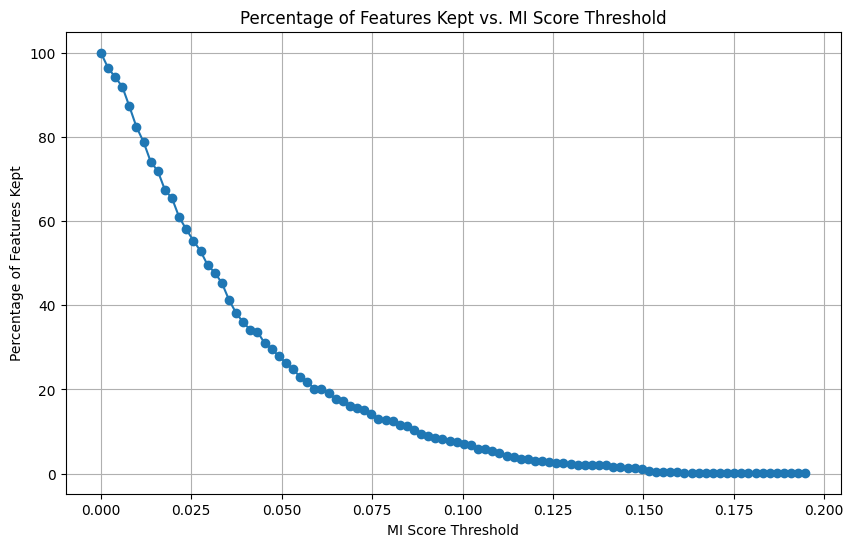

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define thresholds
thresholds = np.linspace(0, np.max(mi_df["MI Score"]), 100)

# Calculate the percentage of features kept for each threshold
percent_features_kept = [(mi_df["MI Score"] >= threshold).mean() * 100 for threshold in thresholds]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(thresholds, percent_features_kept, marker='o')
plt.xlabel('MI Score Threshold')
plt.ylabel('Percentage of Features Kept')
plt.title('Percentage of Features Kept vs. MI Score Threshold')
plt.grid(True)
plt.show()


In [48]:
# loc mi df > 1e-4
mi_df = mi_df[mi_df['MI Score'] > 1e-4]

# eliminate from X to X_mi
X_mi = X[mi_df['Feature']]

print(X_mi.shape)

(160, 448)


In [49]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_mi, y, test_size=0.2, random_state=42)

In [50]:
# simple linear regression
import numpy as np
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# evaluate on train set
y_pred = lr_model.predict(X_test)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

21.38614252872768


## Linear Regression

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

# Define the model
ridge = Ridge()

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky']
}

# Perform grid search
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score (MAE): {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test Set MAE: {mae}")


Best Parameters: {'alpha': 10.0, 'solver': 'auto'}
Best Score (MAE): 19.28574909493812
Test Set MAE: 20.99443703331605


In [53]:
# random forest
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

16.6809375


In [54]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

17.28493620861463


## Decision tree

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Create and train the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = tree_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test Set MAE: {mae}")

Test Set MAE: 21.5


## MLP

In [56]:
import torch
import torch.nn as nn

# Define a PyTorch MLP model class
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        # hidden size is an array, we don't know the length of hidden_size yet
        # if hidden size is a number, wrap an array
        if isinstance(hidden_size, int):
            hidden_size = [hidden_size]

        self.model = nn.Sequential(
          nn.Linear(input_size, hidden_size[0]),
          nn.ReLU(),
          *[layer for i in range(1, len(hidden_size)) for layer in (nn.Linear(hidden_size[i-1], hidden_size[i]), nn.ReLU())],
          nn.Linear(hidden_size[-1], output_size)
      )


    def forward(self, x):
        x = self.model(x)
        return x

# test model
model = MLP(input_size=X_train.shape[1], hidden_size=[32, 64], output_size=1)
print(model)

MLP(
  (model): Sequential(
    (0): Linear(in_features=448, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np

# Wrapper class for sklearn compatibility
class MLPRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, input_size, hidden_size=32, lr=0.001, epochs=10, batch_size=32):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.output_size = 1  # Regression output
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def fit(self, X, y):
        self.model = MLP(self.input_size, self.hidden_size, self.output_size).to(self.device)
        criterion = nn.L1Loss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1).to(self.device)

        dataset = torch.utils.data.TensorDataset(X_tensor, y_tensor)
        dataloader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        for epoch in range(self.epochs):
            for batch_X, batch_y in dataloader:
                optimizer.zero_grad()
                outputs = self.model(batch_X)
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32).to(self.device)
        with torch.no_grad():
            outputs = self.model(X_tensor)
        return outputs.cpu().numpy().flatten()

# Define parameter grid
param_grid = {
    'hidden_size': [[128, 16], [32], [64], [256, 32]],
    'lr': [0.01, 0.001],
    'epochs': [10, 20],
    'batch_size': [2, 4, 8, 16, 32]
}

X_train_np = X_train.values
y_train_np = y_train.values
X_test_np = X_test.values
y_test_np = y_test.values

# Perform grid search
mlp = MLPRegressor(input_size=X_train.shape[1])
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_np, y_train_np)

# Evaluate on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_np)
mae = mean_absolute_error(y_test_np, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test MAE: {mae:.4f}")


Best Parameters: {'batch_size': 4, 'epochs': 10, 'hidden_size': [256, 32], 'lr': 0.01}
Test MAE: 31.3143
